<img src="https://i.imgur.com/Cb6DR9b.png">

# Chess: An analysis of 20.000 games
### by Germán Heim

Chess is a game between two opponents in which each one has 16 moving pieces placed on a board, divided into 64 squares. These squares are alternated in black and white colours, which constitute the 64 possible positions of the pieces for the game's development. Each player has sixteen pieces at the beginning of the game: a king, a queen, two bishops, two knights, two rooks, and eight pawns. The objective of the game is to "overthrow" the opponent's king.

The dataset used in this analysis takes more than 20.000 different games from the platform "[Lichess](http://lichess.org/)" (a free and open-source Internet chess platform run by a non-profit organization), using different time controls and by different rating ELOs.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* or *on your own computer*.

#### Option 1: Running using free online resources

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

### Importing and installing all the libraries
Installing and importing all necessary packages.

In [ ]:
!pip install jovian --upgrade
!pip install opendatasets --upgrade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import opendatasets as od

## Downloading the Dataset

To import the [dataset](https://www.kaggle.com/datasnaek/chess) from [Kaggle](https://www.kaggle.com/), I will use the OpenDatasets library.

In [ ]:
dataset_url = "https://www.kaggle.com/datasnaek/chess"
od.download(dataset_url)

<img src="https://i.imgur.com/KCtknEZ.png">

## Data Preparation and Cleaning
> - Load the dataset into a data frame using Pandas.
> - Explore the number of rows & columns, ranges of values, etc.
> - Handle missing, incorrect or invalid data.
> - Drop columns that are of no use for this project.

In [2]:
# Using Pandas to create a dataframe
chess_df = pd.read_csv("./chess/games.csv")
chess_df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [3]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


This data frame contains 20.0058 games (rows) and 12 columns to work with. I can already see that a few columns are of no interest for this project, such as the id of the game, the id of the players, etc; that I will drop.
There is also the "increment_code" that I will rename as "time_control" since this seems more appropriate to me.

In [4]:
# Checking for null values
chess_df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

There are no null values in this data frame, so I can continue treating the data.

In [5]:
# Dropping columns that are of no use for this project
# The "moves" column will also be dropped because we already have the opening name
chess_df.drop(["id", "created_at","last_move_at", "white_id", "black_id", "moves", "opening_eco", "opening_ply"], inplace=True, axis=1)

# Renaming increment_code to time_control
chess_df.rename(columns = {"increment_code":"time_control"}, inplace = True) 

In [6]:
chess_df

,rated,turns,victory_status,winner,time_control,white_rating,black_rating,opening_name
0,False,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
4,True,95,mate,white,30+3,1523,1469,Philidor Defense
...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense


At this point, we probably want to create a different data frame that contains only the rated games since these are the more serious ones, where people tend to play in a more focused instance.

In [7]:
chess_rated = chess_df.rated == True

In [8]:
chess_rated

0        False
1         True
2         True
3         True
4         True
         ...  
20053     True
20054     True
20055     True
20056     True
20057     True
Name: rated, Length: 20058, dtype: bool

In [9]:
chess_rated_df = chess_df[chess_rated]
chess_rated_df

,rated,turns,victory_status,winner,time_control,white_rating,black_rating,opening_name
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
4,True,95,mate,white,30+3,1523,1469,Philidor Defense
6,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense


<img src="https://i.imgur.com/dJPyAb1.png">

## Exploratory Analysis and Visualization
- Matplotlib - for visualization (Plotting figures)
- Seaborn - for visualization and styling
- Explore distributions of numeric columns
- Explore the relationship between columns using scatter plots, bar charts, etc.

In [10]:
# Setting the style using sns.set_style to "whitegrid"
sns.set_style("darkgrid")

In [11]:
# Changing Matplotlib parameters
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
# Creating a colour palette
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17, 18, 20 ]))

In [13]:
# Creating variables that contain the amount of rated, unrated, and both types of games using the .shape() method
chess_rated_games = chess_rated_df.shape[0]
chess_rated_and_unrated_games = chess_df.shape[0]
chess_unrated_games = chess_rated_and_unrated_games - chess_rated_games

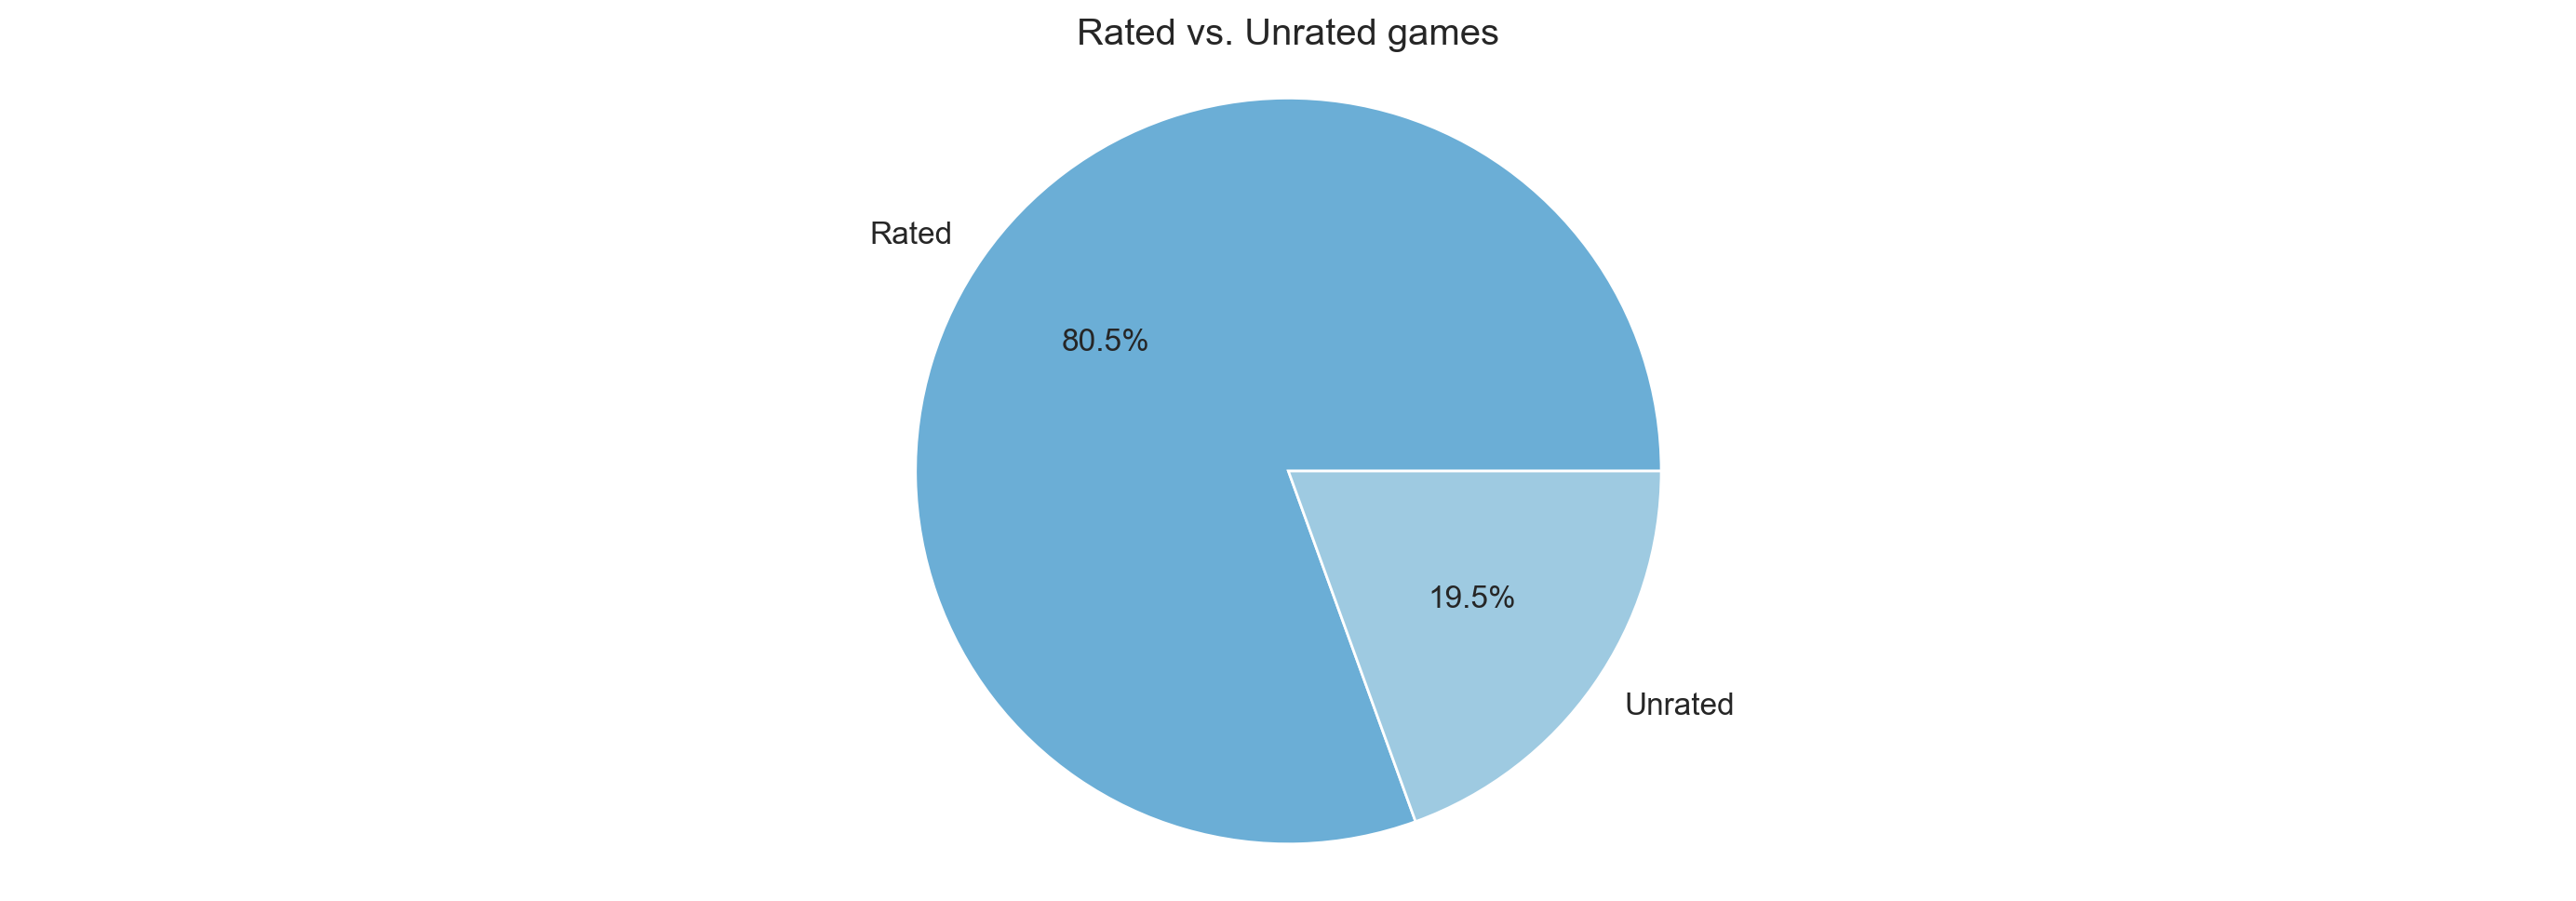

In [14]:
# Plotting a pie chart to set the number of games that are rated vs. unrated
labels = ["Rated", "Unrated"]
variables = [chess_rated_games, chess_unrated_games]

plt.figure(figsize =(14, 5), dpi=200)
plt.title("Rated vs. Unrated games")
plt.pie(variables, labels=labels, autopct='%1.1f%%', colors = inner_colors)
plt.axis('equal')
plt.tight_layout();

After analysing Rated vs. Unrated games, I will work primarily using rated games, as shown as follows.

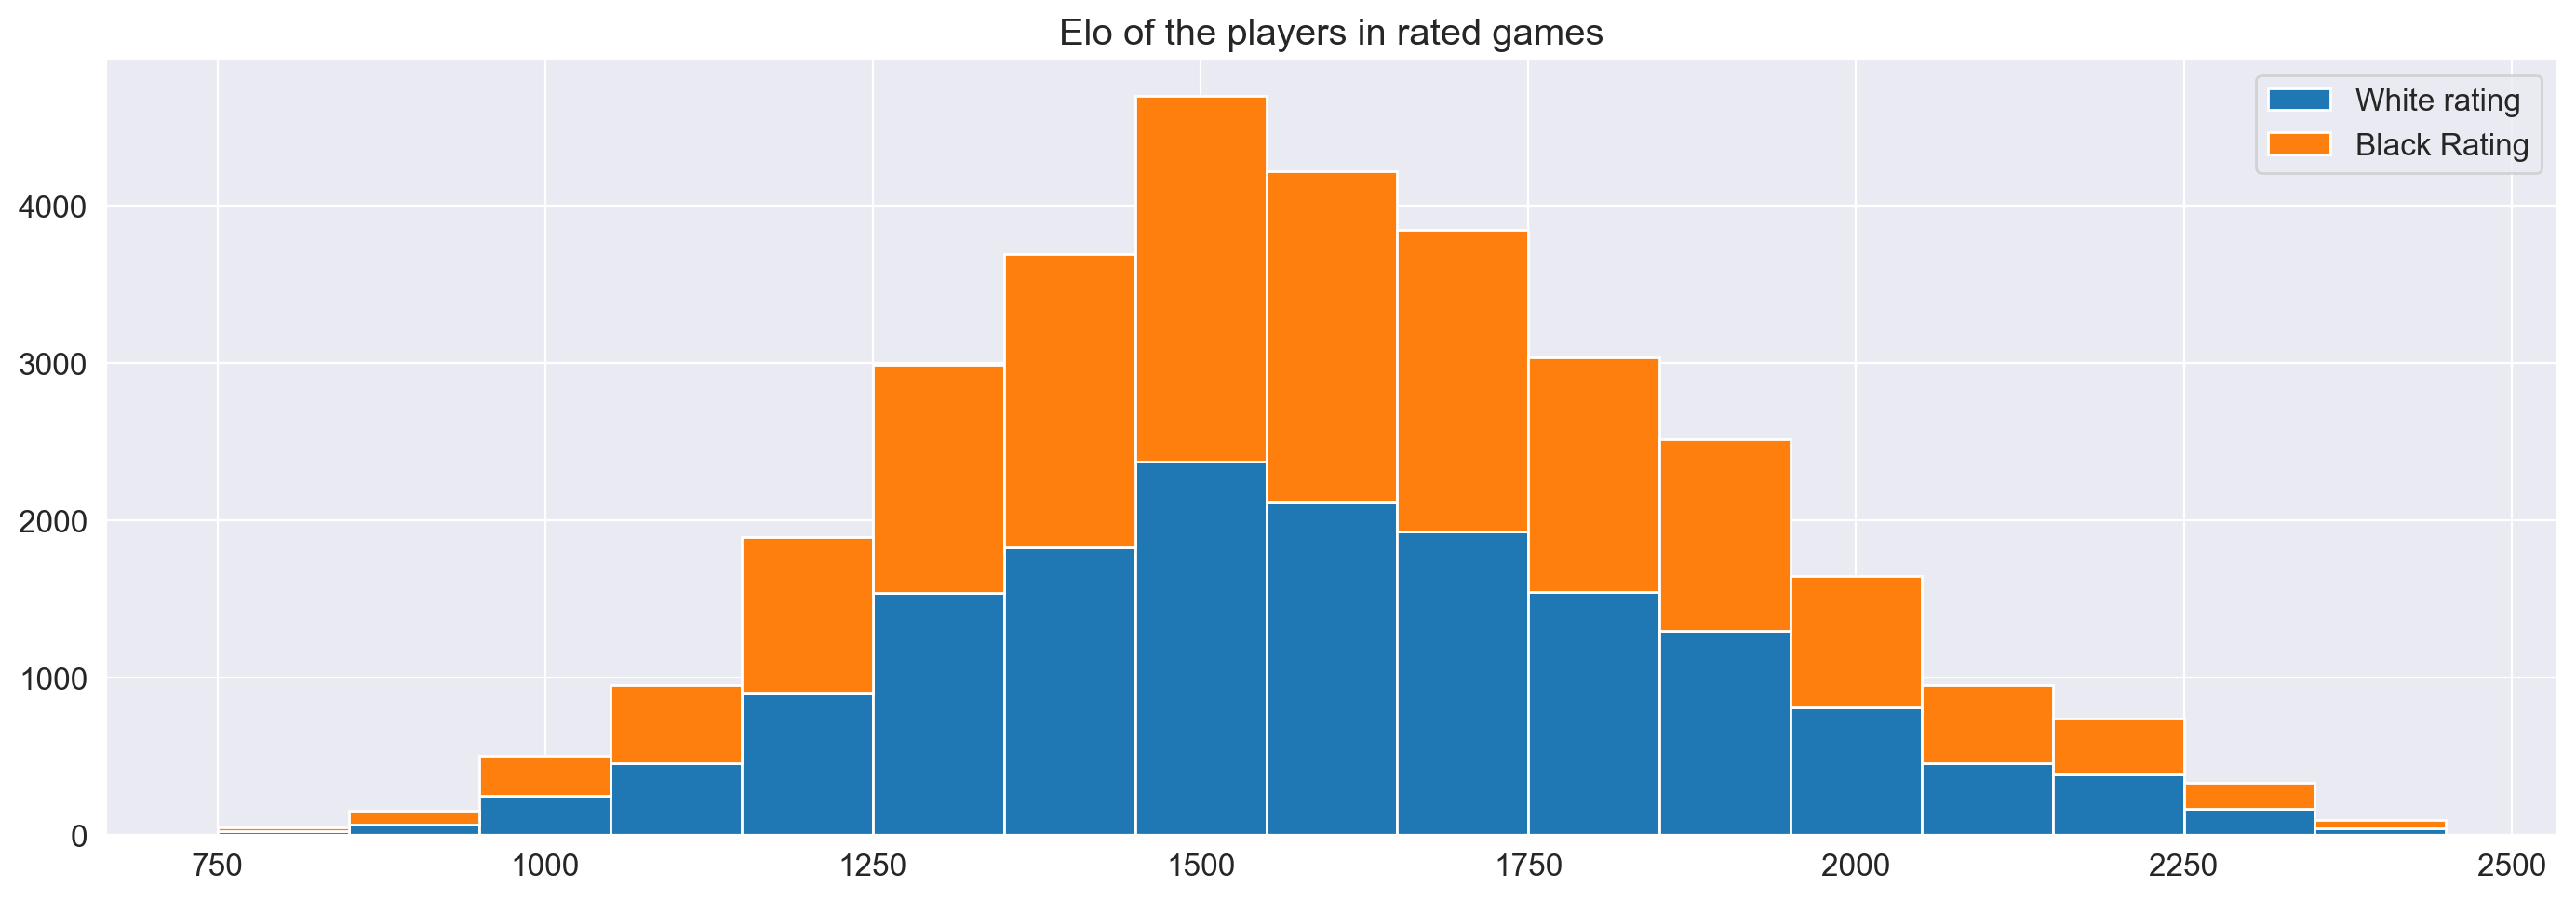

In [15]:
# Plotting the ELO of the players in rated games

plt.figure(figsize =(14, 5), dpi=200)
plt.title("Elo of the players in rated games")
plt.hist([chess_rated_df.white_rating, chess_rated_df.black_rating], 
         stacked=True, bins= np.arange(750, 2500, 100))
plt.legend(["White rating", "Black Rating"])
plt.tight_layout();

In [16]:
# Grouping values by their opening names, and renaming the column.

chess_rated_openings = chess_rated_df.groupby("opening_name").opening_name.count()
chess_rated_openings_df = chess_rated_openings.to_frame()

chess_rated_openings_df.rename(columns={ chess_rated_openings_df.columns[0]: "number_of_times_played"}, inplace = True)
chess_rated_openings_df

,number_of_times_played
opening_name,
Alekhine Defense,38
Alekhine Defense #2,3
Alekhine Defense #3,1
Alekhine Defense: Balogh Variation,1
Alekhine Defense: Brooklyn Variation,2
...,...
Zukertort Opening: Sicilian Invitation,29
Zukertort Opening: Slav Invitation,8
Zukertort Opening: Tennison Gambit,36


In [17]:
# Sorting and getting the top 10 most played openings
chess_rated_openings_sorted_df = chess_rated_openings_df.sort_values("number_of_times_played", ascending=False).head(10)
chess_rated_openings_sorted_df

,number_of_times_played
opening_name,
Van't Kruijs Opening,308
Sicilian Defense,283
Sicilian Defense: Bowdler Attack,248
French Defense: Knight Variation,229
Scotch Game,219
Scandinavian Defense: Mieses-Kotroc Variation,207
Queen's Pawn Game: Mason Attack,187
Scandinavian Defense,186
Horwitz Defense,184


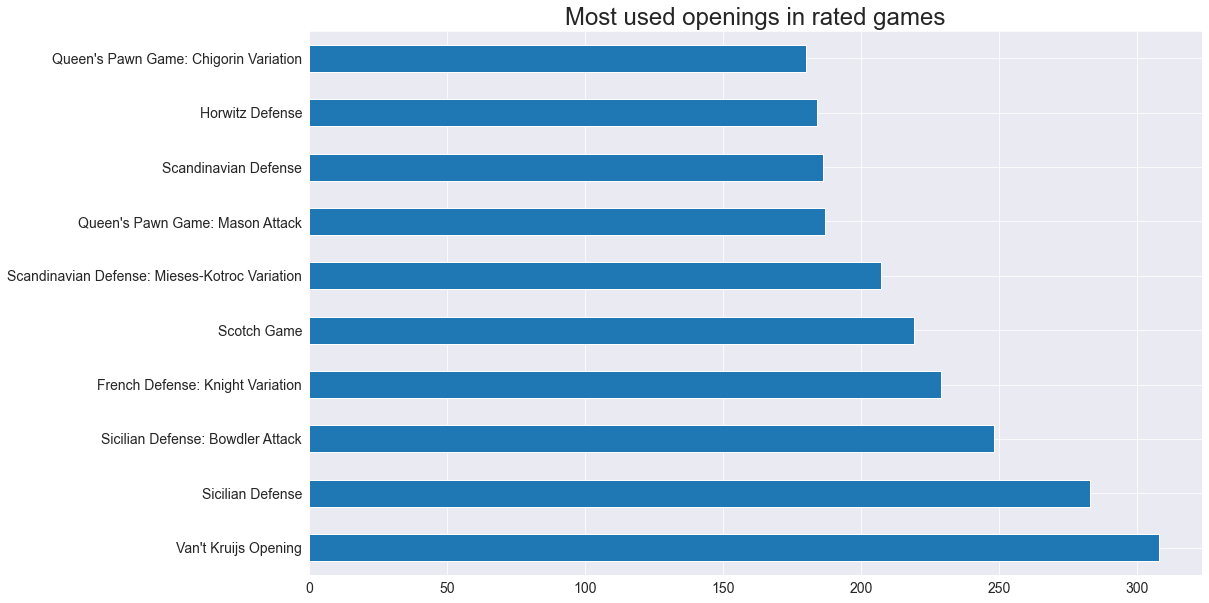

In [18]:
matplotlib.rcParams['font.size'] = 20
chess_rated_openings_sorted_df.plot(kind="barh", 
                                    legend=False, 
                                    title = "Most used openings in rated games", 
                                    figsize = (16,10), 
                                    xlabel = "", 
                                    fontsize = 14);

In [19]:
# Grouping values by their time controls, and renaming the column.

chess_rated_time_control = chess_rated_df.groupby("time_control").time_control.count()
chess_rated_time_control_df = chess_rated_time_control.to_frame()
chess_rated_time_control_df

chess_rated_time_control_df.rename(columns={ chess_rated_time_control_df.columns[0]: "number_of_times_played"}, inplace = True)
chess_rated_time_control_df

,number_of_times_played
time_control,
0+12,5
0+13,1
0+15,6
0+16,15
0+20,1
...,...
90+0,9
90+120,1
90+30,12


In [20]:
# Sorting and getting the top 10 most played time controls
chess_rated_time_control_df = chess_rated_time_control_df.sort_values("number_of_times_played", ascending=False).head(10)
chess_rated_time_control_df

,number_of_times_played
time_control,
10+0,6817
15+0,961
15+15,722
5+5,570
5+8,523
8+0,506
10+5,434
15+10,351
20+0,291


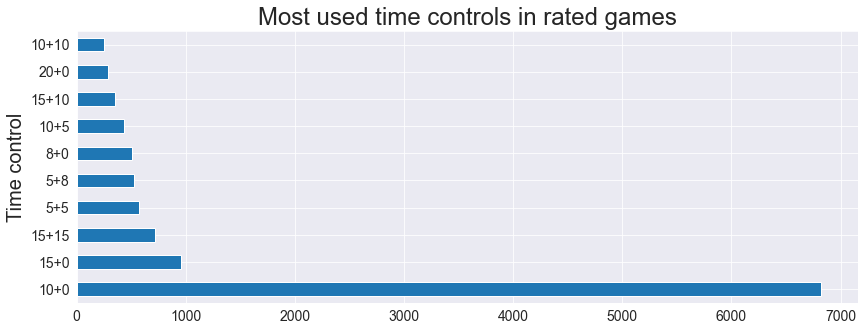

In [21]:
chess_rated_time_control_df.plot(kind="barh", 
                                 legend=False, 
                                 title = "Most used time controls in rated games", 
                                 figsize = (14,5), 
                                 xlabel = "Time control", 
                                 fontsize = 14);

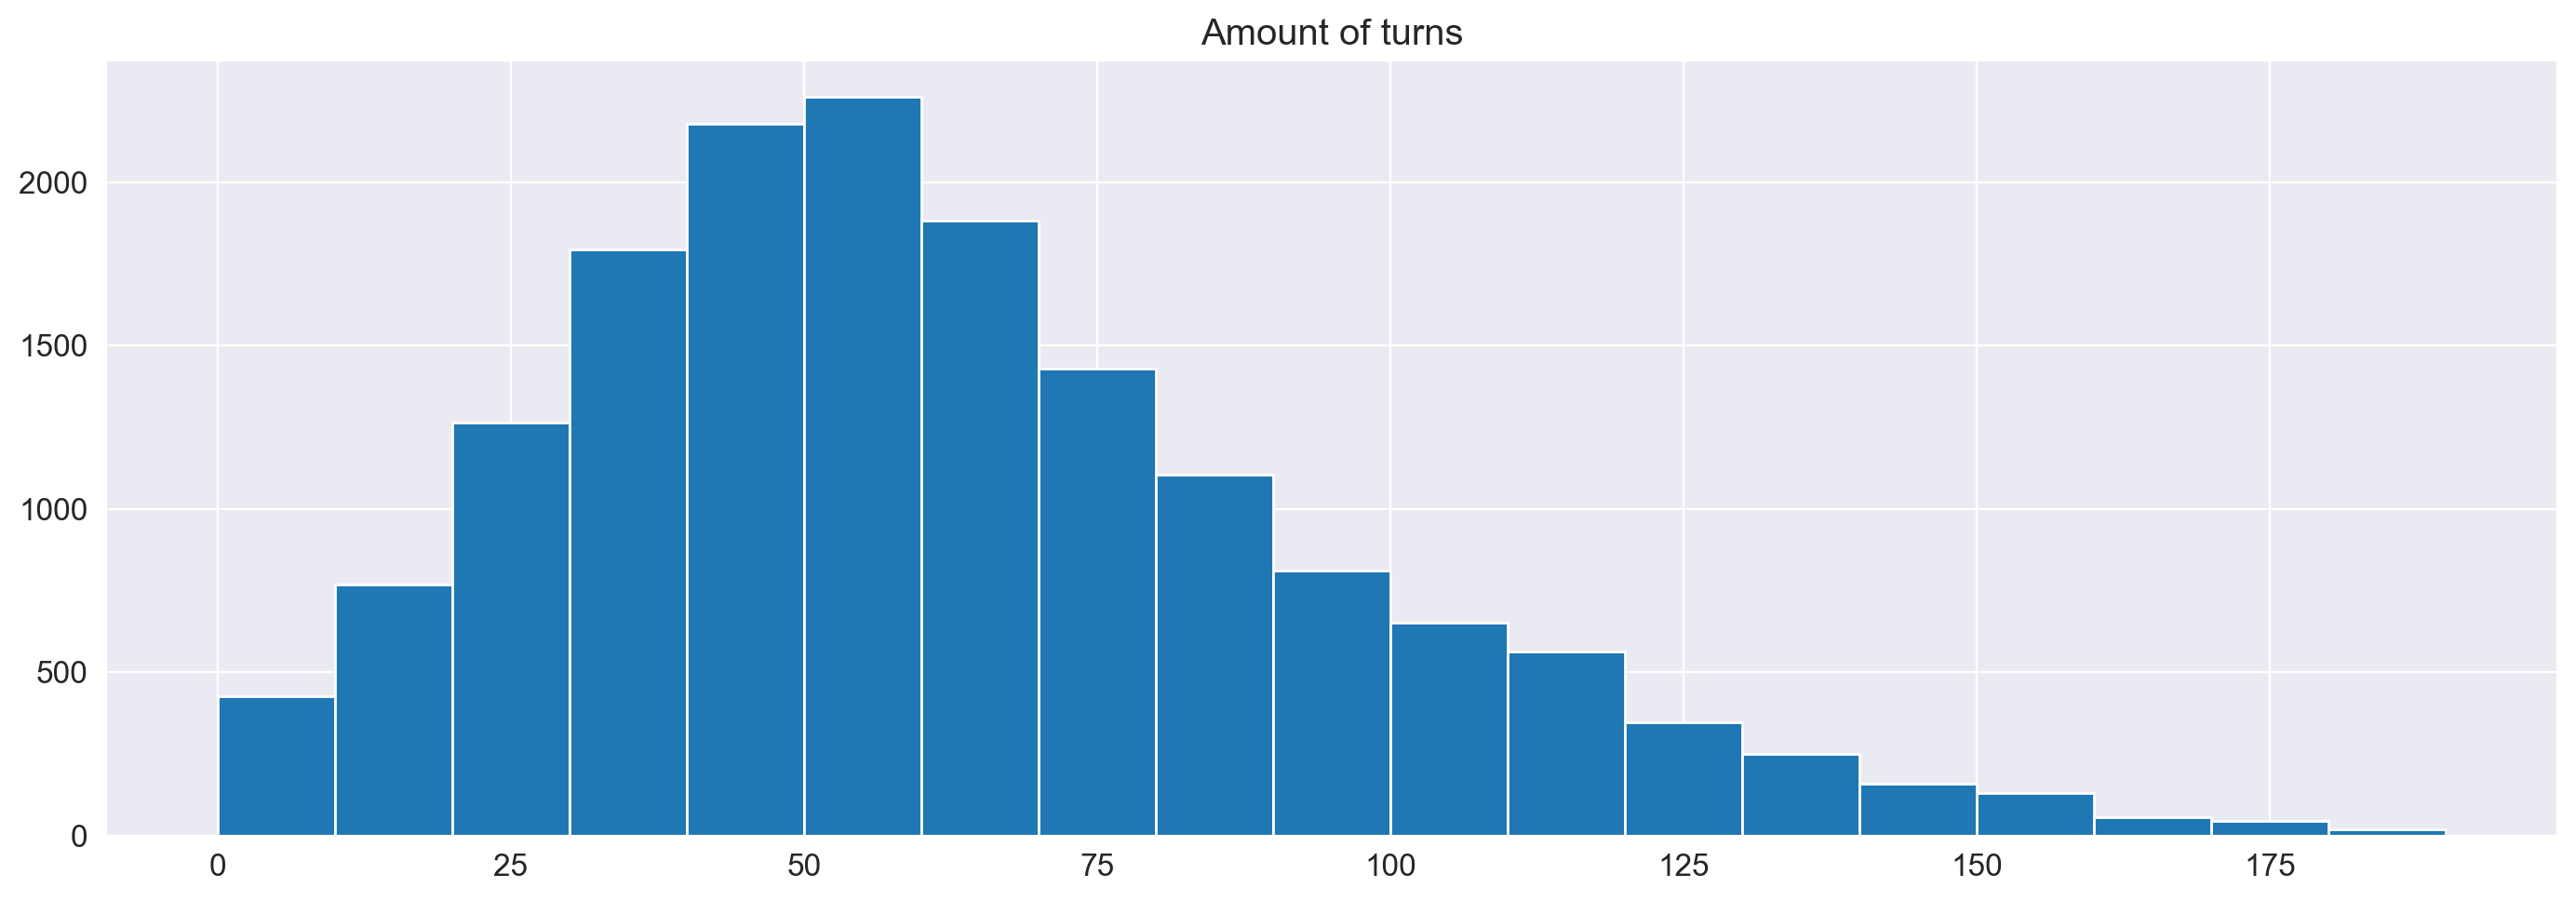

In [22]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize =(14, 5), dpi=200)
plt.title('Amount of turns')
plt.hist(chess_rated_df.turns, bins=np.arange(0, 200, 10))
plt.tight_layout();

In [23]:
chess_rated_df

,rated,turns,victory_status,winner,time_control,white_rating,black_rating,opening_name
1,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
2,True,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
3,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
4,True,95,mate,white,30+3,1523,1469,Philidor Defense
6,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,Dutch Defense
20054,True,82,mate,black,10+0,1233,1196,Queen's Pawn
20055,True,35,mate,white,10+0,1219,1286,Queen's Pawn Game: Mason Attack
20056,True,109,resign,white,10+0,1360,1227,Pirc Defense


In [24]:
# Grouping values by the winner, and renaming the column.
chess_rated_winner = chess_rated_df.groupby("winner").winner.count()
chess_rated_winner_df = chess_rated_winner.to_frame()

chess_rated_winner_df.rename(columns={ chess_rated_winner_df.columns[0]: "number_of_times"}, inplace = True)
chess_rated_winner_df

,number_of_times
winner,
black,7384
draw,719
white,8052


In [25]:
# Setting each win in variables
black_wins = chess_rated_winner_df.number_of_times[0]
white_wins = chess_rated_winner_df.number_of_times[2]
draws = chess_rated_winner_df.number_of_times[1]
total_matches = white_wins + black_wins + draws

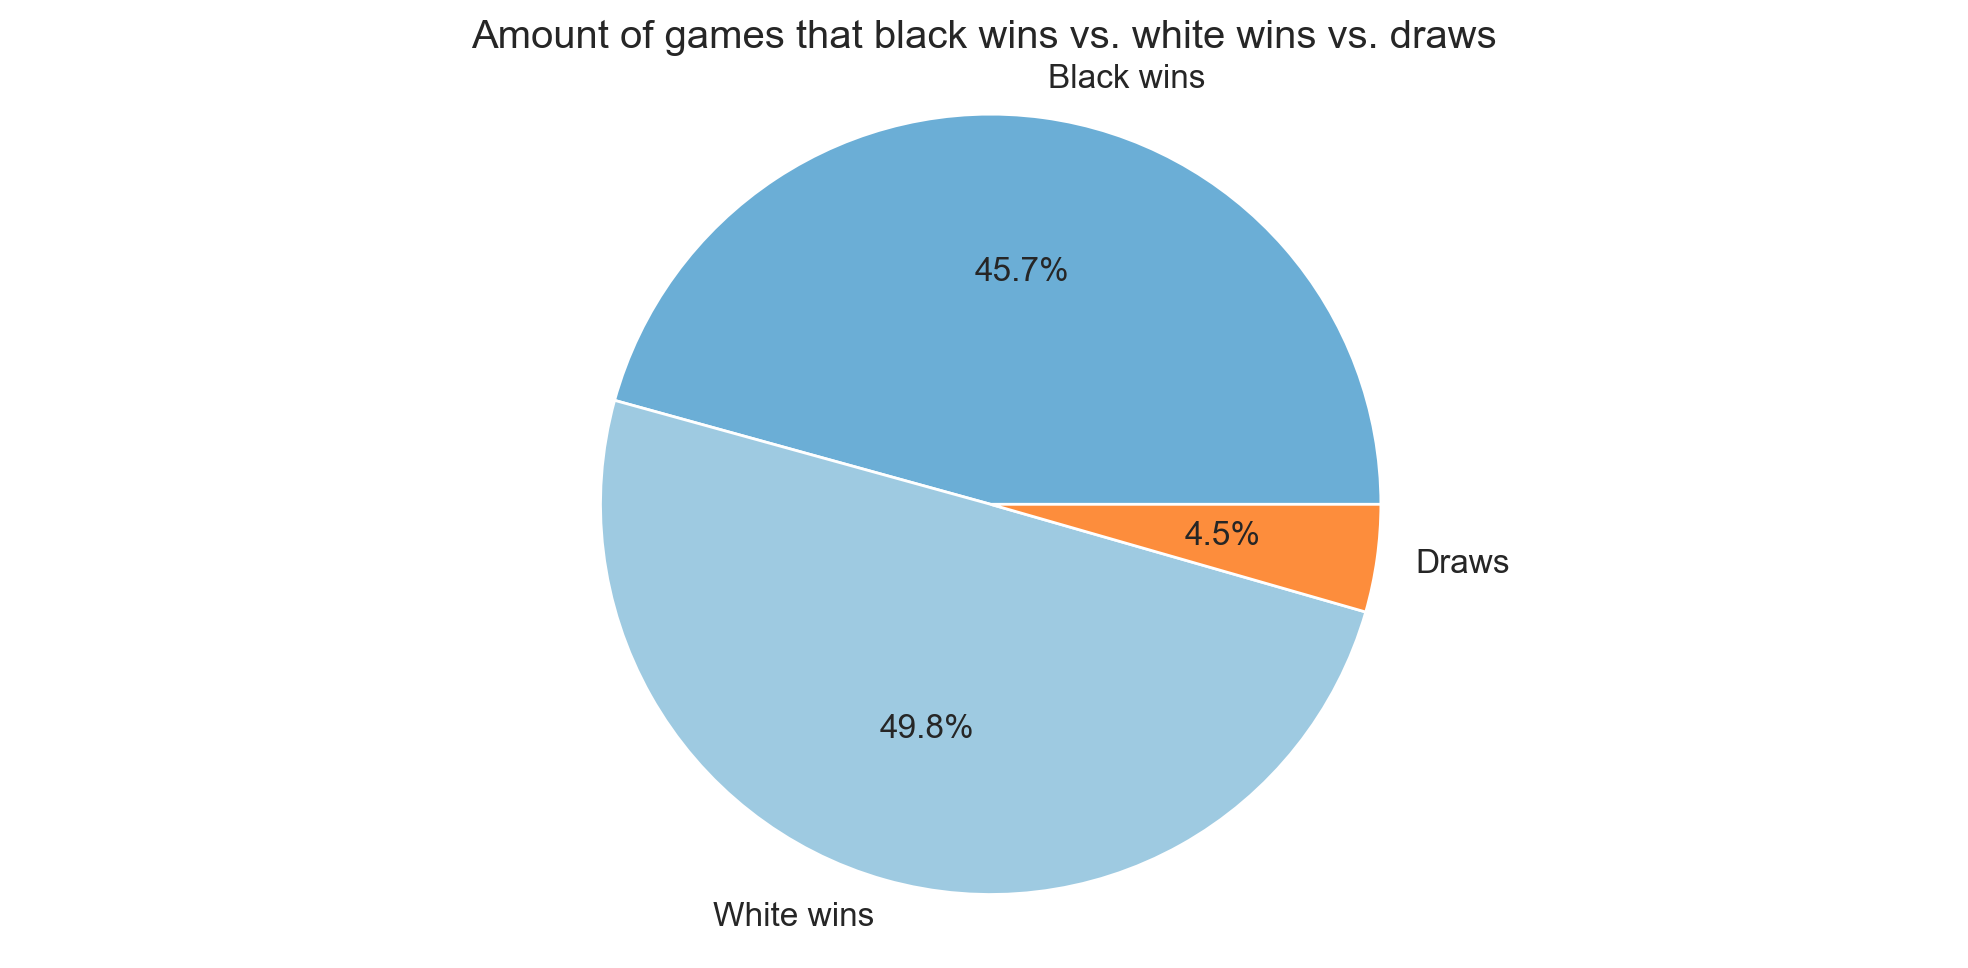

In [26]:
# Plotting a pie chart to set the amount of games that black wins vs. white wins vs. draws
labels = ["Black wins", "White wins", "Draws"]
variables = [black_wins, white_wins, draws]

plt.figure(figsize =(10, 5), dpi=200)
plt.title("Amount of games that black wins vs. white wins vs. draws")
plt.pie(variables, labels=labels, autopct='%1.1f%%', colors = inner_colors)
plt.axis('equal')
plt.tight_layout();

In [27]:
# Grouping values by how the match ended (victory status)
chess_rated_victory_status = chess_rated_df.groupby("victory_status").victory_status.count()
chess_rated_victory_status_df = chess_rated_victory_status.to_frame()

chess_rated_victory_status_df.rename(columns={ chess_rated_victory_status_df.columns[0]: "number_of_times"}, inplace = True)
chess_rated_victory_status_df

,number_of_times
victory_status,
draw,681
mate,5146
outoftime,1359
resign,8969


In [28]:
# Setting each of the victory status in variables
draws_victory_status = chess_rated_victory_status_df.number_of_times[0]
mates = chess_rated_victory_status_df.number_of_times[1]
out_of_time = chess_rated_victory_status_df.number_of_times[2]
resign = chess_rated_victory_status_df.number_of_times[3]

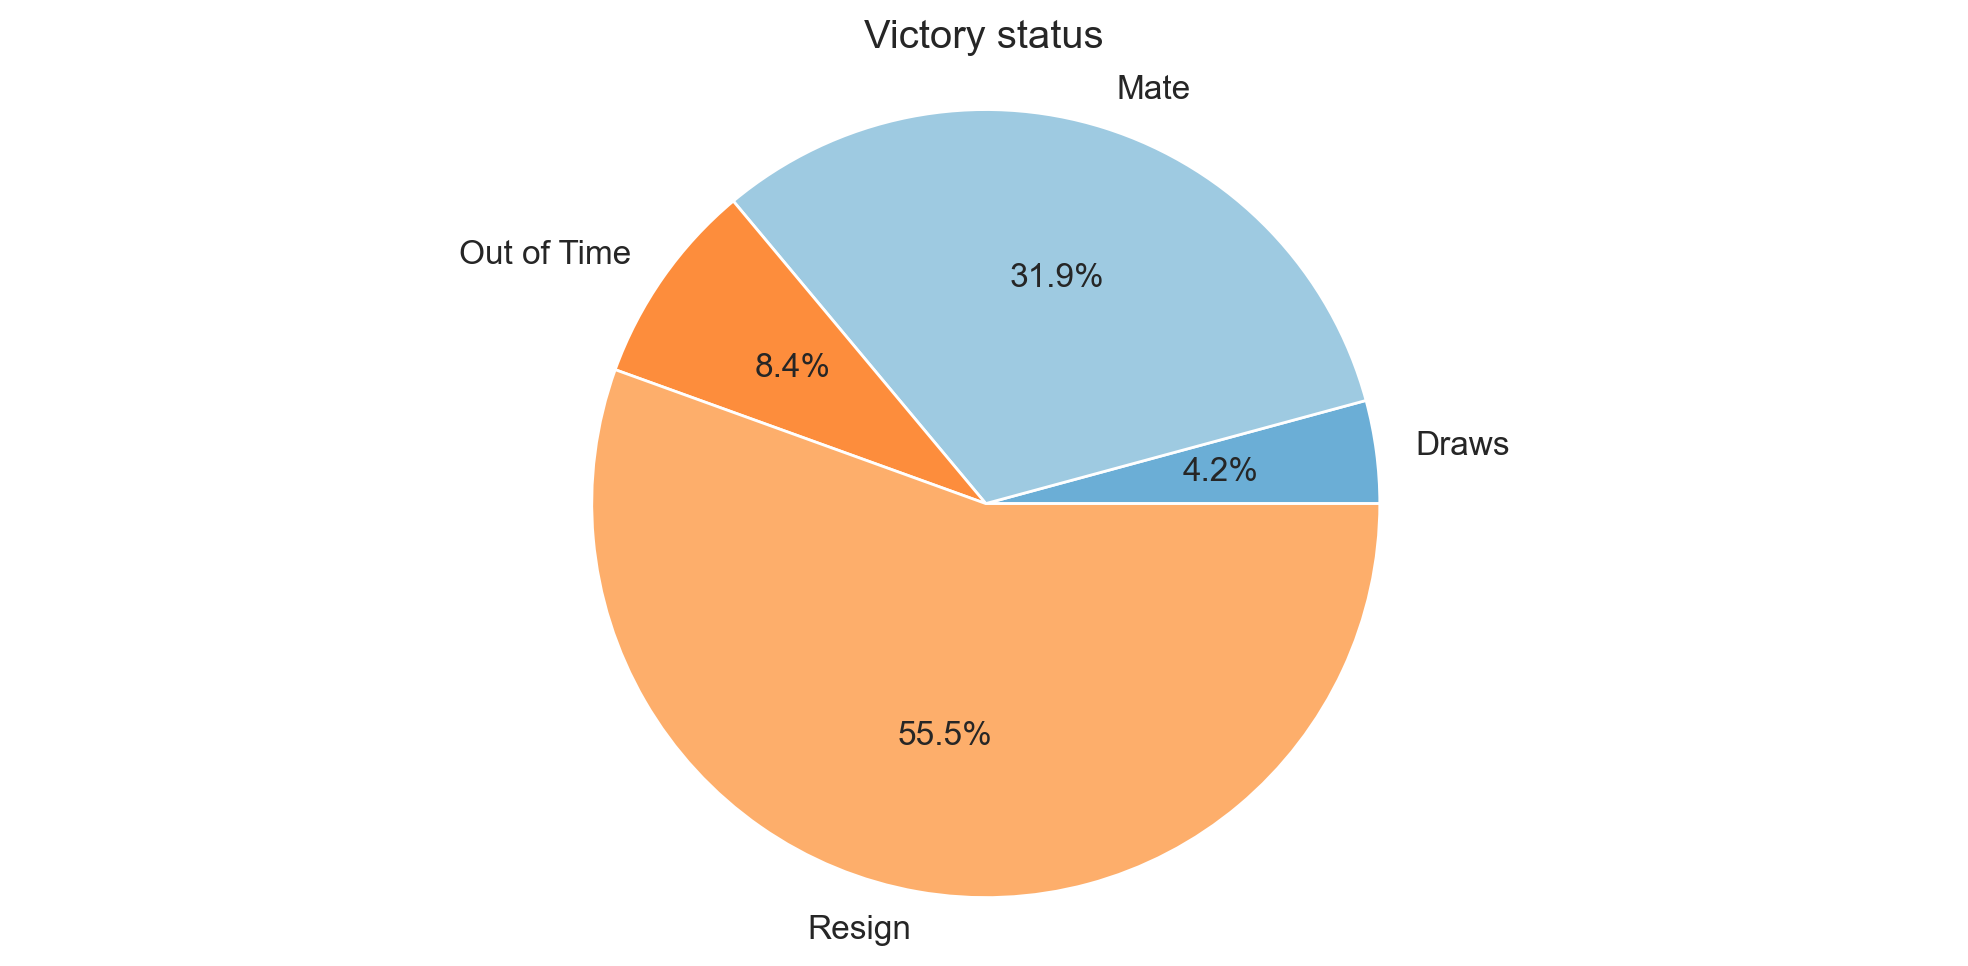

In [29]:
# Plotting a pie chart to set the amount of games that black wins vs. white wins vs. draws
labels = ["Draws", "Mate", "Out of Time", "Resign"]
variables = [draws_victory_status, mates, out_of_time, resign]

plt.figure(figsize =(10, 5), dpi=200)
plt.title("Victory status")
plt.pie(variables, labels=labels, autopct='%1.1f%%', colors = inner_colors)
plt.axis('equal')
plt.tight_layout();

<img src="https://i.imgur.com/X6kmfd6.png">

# Conclusion
With this Exploratory Data Analysis, I can conclude a few things using the graphs made in this project.

> - Of all the games played, 80.5% were Rated games, while the other 19.5% were unrated.
> - The ELO (rating) of the players in the dataset appears to be mainly between the 1400 to 1700 range.
> - Most games have a number of turns that range from 40 to 60 turns.
> - Of the 16.155 rated games, black won 7384 (45.7%), white won 8052 (49.8%) and 7219 were draws (4.5%).
> - The openings used in the games of this dataset are varied, although the most used one was the Van't Kruijs Opening, where white starts with 1. e3; followed by the Sicilian Defense, where white starts with 1.e4 and black responds with c5, preventing white from taking the whole centre with d4.
> - Although Van't Kruijs Opening was the most played, I believe that that is because it is only one move (with no variations included in the opening name itself), where openings that star with 1. e4 or 1. d4 usually have different lines.
> - Of the time controls used, 10+0 (10 minutes without increments) was the most played, with 6.817 plays, being a "Rapid" time control.
> - When it comes to how the match ends, 8.969 games ended by the opponent resigning (55.5%), 5.146 ended with a checkmate (31.9%), 1.359 ended by flagging (running out of time)(8.4%), and 681 were draws (4.2%).

Overall, I believe that this project is helpful to understand some of the statistics of chess.


<img src="https://i.imgur.com/frMuhb1.png">

# References and Further Reading

* [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
* [NumPy Documentation](https://numpy.org/doc/)
* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)
* [Plot a pie chart in Python using Matplotlib](https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/)
* [Chess Games Dataset (Lichess)](https://www.kaggle.com/datasnaek/chess)